In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('/home/moglix/Downloads/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data.shape

(5110, 12)

Handling Missing Values

<AxesSubplot:xlabel='bmi'>

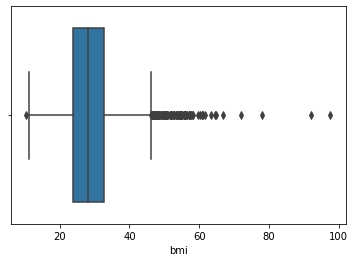

In [25]:
sns.boxplot(x=data['bmi'])

Here we can see it is case of MCAR where our bmi missing values does not depend  on any other feature as there are null values only in bmi feature. Due to presence of outliers we will be doing median imputation.

In [7]:
median=data['bmi'].median()
median

28.1

In [8]:
data.fillna(median,inplace=True)

In [9]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Explotary Data Analysis

In [10]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=="O"]
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

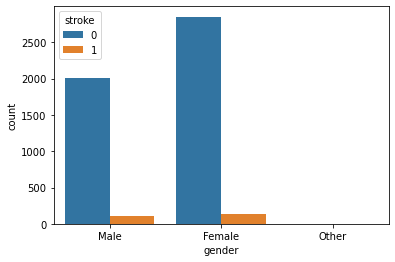

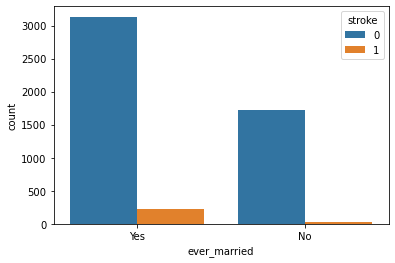

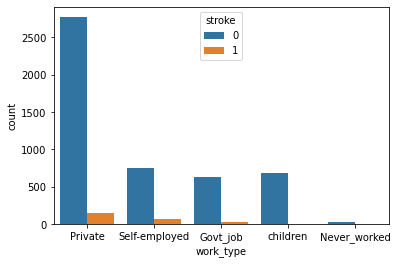

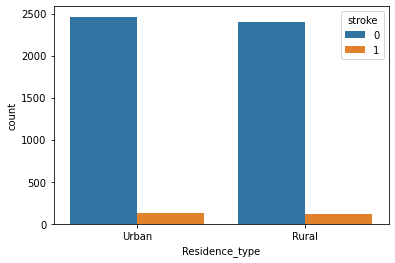

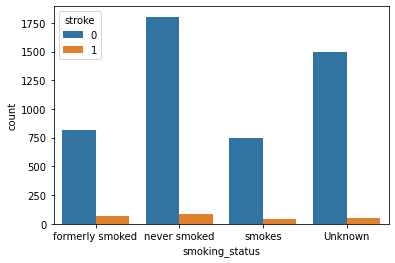

<Figure size 432x288 with 0 Axes>

In [11]:
for feature in categorical_features:
    sns.countplot(x=feature,hue='stroke',data=data)
    plt.figure()

Observations

1. People working in private companies have detected with more strok problems.

2. People who never smoked are having high stroke as compared to others

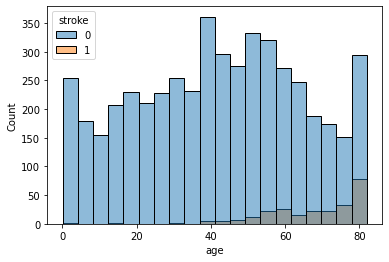

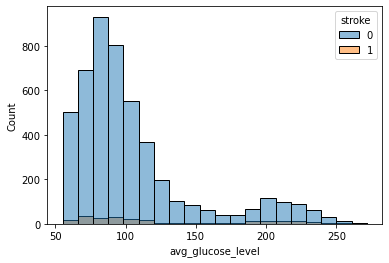

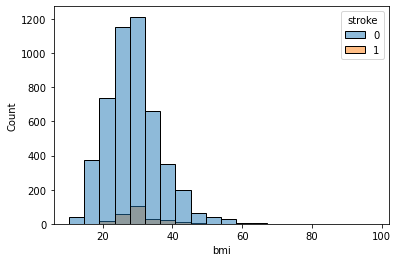

<Figure size 432x288 with 0 Axes>

In [12]:
numerical_features=['age','avg_glucose_level','bmi']
for feature in numerical_features :
    sns.histplot(x=feature,data=data,hue="stroke",bins=20)
    plt.figure()

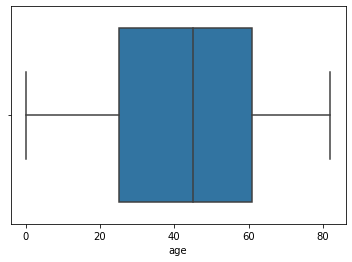

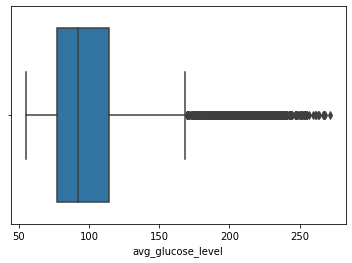

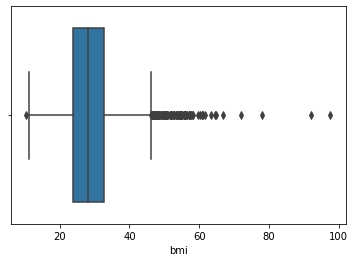

<Figure size 432x288 with 0 Axes>

In [13]:
numerical_features=['age','avg_glucose_level','bmi']
for feature in numerical_features :
    sns.boxplot(x=feature,data=data)
    plt.figure()

Observations Numerical Features

1. The bmi and avg_glucose features are having high number of outliers.

2. Histogram says age>=80 and bmi=30 have higher stroke problem.

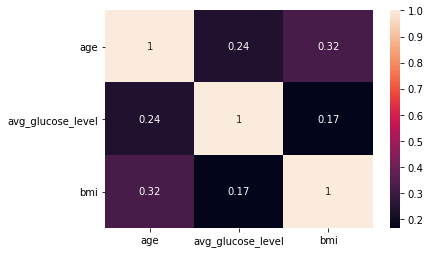

In [14]:
figure=sns.heatmap(data[numerical_features].corr(),annot=True)

Data Preparation for model

Handling categorical Features:


1. We can use label encoding for work_type and smoking status to avoid the increase in number of independent feature.## we can use one hot encoding as well

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for feature in categorical_features:
    data[feature]=label_encoder.fit_transform(data[feature])

In [16]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [17]:
data.drop('id',axis=1,inplace=True)

We can avoid feature scaling if we are using models like RandomForest,Boosting techniques that are not impacted by outliers and do no require feature scaling.

In [29]:

data.to_csv('data_without_scaling')

 We would be using logistic regression that would be impacted by magnitudes of numerical features and our outliers are also important so we require feature scaling and outliers need to be replaced

In [30]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


As it contains outliers it is adviced to use Robust scaler 

In [36]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [37]:
scaled_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.611111,0.0,1.0,0.0,0.0,0.0,3.712987,0.944444,-0.5,1.0
1,0.0,0.444444,0.0,0.0,0.0,1.0,-1.0,2.994300,0.000000,0.0,1.0
2,1.0,0.972222,0.0,1.0,0.0,0.0,-1.0,0.380920,0.488889,0.0,1.0
3,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,2.153481,0.700000,0.5,1.0
4,0.0,0.944444,1.0,0.0,0.0,1.0,-1.0,2.231917,-0.455556,0.0,1.0


In [41]:
scaled_data.to_csv("scaled_data")

Summary

1. Handled missing variable and outliers.
2. Scaling performed.
3. Eda done.